In [1]:
## Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


import keras
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Loading the data

df = pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


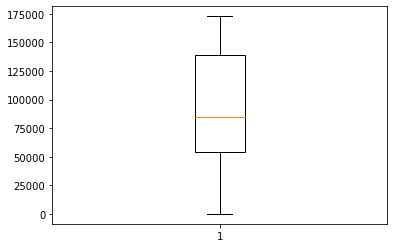

In [7]:
plt.boxplot(df['Time'])
plt.show()

In [8]:
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


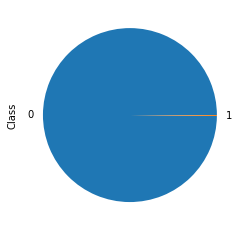

In [9]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

In [10]:
df.drop('Time', axis=1, inplace=True)

In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
y = df.pop('Class')
X = df

## Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)
col = X_train.columns

In [14]:
print('X_train shape is {}'.format(X_train.shape))
print('X_test shape is {}'.format(X_test.shape))
print('y_train shape is {}'.format(y_train.shape))
print('y_test shape is {}'.format(y_test.shape))


X_train shape is (227845, 29)
X_test shape is (56962, 29)
y_train shape is (227845,)
y_test shape is (56962,)


In [15]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [16]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

## Class Imbalance Solution

In [17]:
## Using SMOTE technique

sm = SMOTE(random_state=0)

In [18]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [19]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(454902, 29)
(454902,)


In [20]:
y_train_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [21]:
## Using Adasyn Technique

adasyn = ADASYN(random_state=0)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [22]:
print('X_train by adasyn shape is {}'.format(X_train.shape))
print('y_train by adasyn shape is {}'.format(y_train.shape))

X_train by adasyn shape is (227845, 29)
y_train by adasyn shape is (227845,)


### Model Building using below algoritms

1. Logistic Regression
2. Adaboost 
3. Neural Network

### Model Building by Logistic Regression

In [23]:
## Logistic Regression by smote points

lr = LogisticRegression(random_state=42)

In [24]:
model1 = lr.fit(X_train_smote, y_train_smote)

In [25]:
y_train_pred_lr = model1.predict(X_train_smote)

In [26]:
print(classification_report(y_train_smote, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    227451
           1       0.98      0.94      0.96    227451

    accuracy                           0.96    454902
   macro avg       0.96      0.96      0.96    454902
weighted avg       0.96      0.96      0.96    454902



In [27]:
print(confusion_matrix(y_train_smote, y_train_pred_lr))

[[223061   4390]
 [ 14098 213353]]


In [28]:
## Logistic Regression on data points by Adasyn sampling points

lr2 = LogisticRegression(random_state=42)

In [29]:
model2 = lr2.fit(X_train_adasyn, y_train_adasyn)

In [30]:
y_train_pred_lr2 = model2.predict(X_train_adasyn)

In [31]:
print(classification_report(y_train_adasyn, y_train_pred_lr2))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    227451
           1       0.94      0.91      0.93    227425

    accuracy                           0.93    454876
   macro avg       0.93      0.93      0.93    454876
weighted avg       0.93      0.93      0.93    454876



### Model Building by Adaboost Classifier

In [32]:
## Adaboost classifier on SMOTE data points

adaboost = AdaBoostClassifier(random_state=42)

In [33]:
model3 = adaboost.fit(X_train_smote, y_train_smote)

In [34]:
y_train_pred_adaboost = model3.predict(X_train_smote)

In [35]:
print(classification_report(y_train_smote, y_train_pred_adaboost))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227451
           1       0.98      0.96      0.97    227451

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902



In [36]:
print(confusion_matrix(y_train_smote, y_train_pred_adaboost))

[[222925   4526]
 [  8463 218988]]


In [37]:
print(accuracy_score(y_train_smote, y_train_pred_adaboost))

0.9714465972890864


In [38]:
## Adaboost classifier on adasyn data points

adaboost2 = AdaBoostClassifier(random_state=42)


In [39]:
model4 = adaboost2.fit(X_train_adasyn, y_train_adasyn)

In [40]:
y_train_pred_adaboost2 = model4.predict(X_train_adasyn)

In [41]:
print(classification_report(y_train_adasyn, y_train_pred_adaboost2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    227451
           1       0.97      0.96      0.96    227425

    accuracy                           0.96    454876
   macro avg       0.96      0.96      0.96    454876
weighted avg       0.96      0.96      0.96    454876



In [42]:
print(confusion_matrix(y_train_adasyn, y_train_pred_adaboost2))

[[219729   7722]
 [  8936 218489]]


In [43]:
print(accuracy_score(y_train_adasyn, y_train_pred_adaboost2))

0.9633790307688249


## Model by Neural Network

In [44]:
model5 = Sequential()

In [45]:
model5.add(Dense(32, input_dim=29, activation='relu'))
model5.add(Dropout(0.25))

model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.30))

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.25))

model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.25))

model5.add(Dense(1, activation='sigmoid'))


In [46]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model_history = model5.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split= 0.2 )

Epoch 1/10
11373/11373 [==============================] - 31s 3ms/step - loss: 0.1225 - accuracy: 0.9643 - val_loss: 0.0307 - val_accuracy: 0.9885
Epoch 2/10
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0441 - val_accuracy: 0.9819
Epoch 3/10
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0682 - val_accuracy: 0.9744
Epoch 4/10
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0204 - val_accuracy: 0.9909
Epoch 5/10
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0920 - val_accuracy: 0.9697
Epoch 6/10
11373/11373 [==============================] - 33s 3ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0295 - val_accuracy: 0.9859
Epoch 7/10
11373/11373 [==============================] - 35s 3ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0

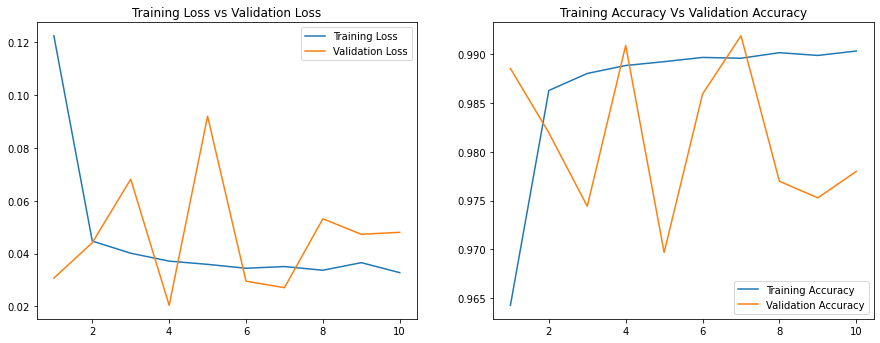

In [48]:
plt.figure(figsize=(15,12))

epochs_range = [i for i in range(1,11)]

plt.subplot(2,2,1)
plt.plot(epochs_range, model_history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, model_history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='best')


plt.subplot(2,2,2)
plt.plot(epochs_range, model_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training Accuracy Vs Validation Accuracy')
plt.legend(loc='best')
plt.show()


In [49]:
y_train_pred_neural_network = (model3.predict(X_train_smote) > 0.5).astype("int32")

In [50]:
print(classification_report(y_train_smote, y_train_pred_neural_network))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227451
           1       0.98      0.96      0.97    227451

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902



## Model observation

1. Logistic Regression
 -  There is some variance in precision and recall in logistic regression for both smote and adasyn data points
2. Adaboost Classifier
 - The model performs good on training points we can go and test the model with test data set
3. Neural Network 
 - The model performs good on training points we can go and test the model with test data set

## Model evaluation on test set by Adaboost classifer

In [51]:
y_test.value_counts()


0    56864
1       98
Name: Class, dtype: int64

In [52]:
y_test_pred_adaboost = model3.predict(X_test)

In [53]:
print(classification_report(y_test, y_test_pred_adaboost))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.94      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [54]:
print(confusion_matrix(y_test, y_test_pred_adaboost))

[[55724  1140]
 [    6    92]]


## Model evaluation on test set by Neural Network

In [55]:
y_test_pred_neural_network = (model5.predict(X_test) > 0.5).astype("int32")

In [56]:
print(classification_report(y_test, y_test_pred_neural_network))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.88      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [57]:
print(confusion_matrix(y_test, y_test_pred_neural_network))

[[56794    70]
 [   12    86]]


## Final Observation
- We can go with adaboost classifier as the model detect 92 fraud customers out of 98 customers on unseen data.
  So we can deploy the model in live environment and monitor the performance monthly how the model is performing
  live data. 